<h3>
2013313737<br>
김무성<br>
Data Mining Assignment Number 1
</h3>

<h6>Target Dataset: wine.csv</h6><br>
Description: chemical analysis of wines grown in Italy<br>
             Two types of wines and 9 constituents<br>


<h6>CH1: Building a Decision Tree</h6><br>
1. Build a decision tree model<br>
1-1. read data<br>
1-2. create decision tree<br>
2. Plot decision tree with classification rule<br>
3. Most important variable to classify type<br>
4. Compute the training error<br>
5. Apply wine_test.csv<br>
5-1. predict with model<br>
5-2. show predicted result<br>
6. Two most important variables<br>
6-1. plot trainig set on two-dimensional space<br>
6-2. visulaize obesrvation with two colors<br><br>

7. 사고실험.<br>
7-1. 도메인 지식: '와인의 맛과 분류를 결정하는 것은?'<br>
https://ko.wikipedia.org/wiki/%ED%8F%AC%EB%8F%84%EC%A3%BC%EC%9D%98_%ED%8E%98%EB%86%80_%EC%84%B1%EB%B6%84
https://ko.wikipedia.org/wiki/%ED%94%8C%EB%9D%BC%EB%B3%B4%EB%85%B8%EC%9D%B4%EB%93%9C
7-2. 비교

In [1]:
import pandas as pd
import numpy as np
# to draw
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.cross_validation import train_test_split
# dot to png
import pydotplus
import pydot
# (https://explained.ai/decision-tree-viz/)

C:\Users\miger\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


#1. Build a decision tree model<br>
1-1. read data<br>
1-2. create decision tree<br>

In [2]:
wine = pd.read_csv("wine.csv")
wine.head()

,wine,alcohol,acid,ash1,ash2,magnesium,phenol,flavanoids,color,hue
0,A,14.23,1.71,2.43,15.6,127,2.80,3.06,5.64,1.04
1,A,13.20,1.78,2.14,11.2,100,2.65,2.76,4.38,1.05
2,A,13.16,2.36,2.67,18.6,101,2.80,3.24,5.68,1.03
3,A,14.37,1.95,2.50,16.8,113,3.85,3.49,7.80,0.86
4,A,13.24,2.59,2.87,21.0,118,2.80,2.69,4.32,1.04


In [3]:
type(wine)

pandas.core.frame.DataFrame

In [4]:
wine.dtypes

wine           object
alcohol       float64
acid          float64
ash1          float64
ash2          float64
magnesium       int64
phenol        float64
flavanoids    float64
color         float64
hue           float64
dtype: object

In [5]:
wine.isnull().sum()

wine          0
alcohol       0
acid          0
ash1          0
ash2          0
magnesium     0
phenol        0
flavanoids    0
color         0
hue           0
dtype: int64

In [6]:
wine.describe()

,alcohol,acid,ash1,ash2,magnesium,phenol,flavanoids,color,hue
count,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,13.086000,1.746750,2.361000,18.335000,101.950000,2.496000,2.423375,4.303625,1.115575
std,0.855947,0.658398,0.298191,3.426778,17.058277,0.550876,0.743440,1.494194,0.131343
min,11.620000,0.890000,1.360000,10.600000,70.000000,1.100000,0.570000,1.740000,0.790000
25%,12.330000,1.397500,2.210000,16.000000,88.750000,2.087500,1.827500,3.140000,1.037500
50%,13.090000,1.660000,2.360000,18.000000,99.500000,2.530000,2.525000,4.225000,1.105000
75%,13.752500,1.870000,2.565000,20.000000,110.000000,2.882500,2.980000,5.212500,1.222500
max,14.830000,3.990000,3.220000,30.000000,162.000000,3.850000,3.930000,8.700000,1.450000


In [7]:
wine.corr()

,alcohol,acid,ash1,ash2,magnesium,phenol,flavanoids,color,hue
alcohol,1.000000,0.167665,0.262682,-0.347214,0.215335,0.559357,0.688218,0.738866,-0.075835
acid,0.167665,1.000000,0.358915,0.072650,0.162226,0.048999,0.136215,0.092680,-0.297718
ash1,0.262682,0.358915,1.000000,0.407956,0.271957,0.267142,0.342227,0.216394,-0.040156
ash2,-0.347214,0.072650,0.407956,1.000000,-0.043236,-0.167409,-0.203733,-0.351074,0.182469
magnesium,0.215335,0.162226,0.271957,-0.043236,1.000000,0.208636,0.152390,0.175158,-0.030744
phenol,0.559357,0.048999,0.267142,-0.167409,0.208636,1.000000,0.861702,0.595567,0.063521
flavanoids,0.688218,0.136215,0.342227,-0.203733,0.152390,0.861702,1.000000,0.733422,0.070144
color,0.738866,0.092680,0.216394,-0.351074,0.175158,0.595567,0.733422,1.000000,-0.141494
hue,-0.075835,-0.297718,-0.040156,0.182469,-0.030744,0.063521,0.070144,-0.141494,1.000000


In [8]:
colName = wine.columns.tolist()
colName = colName[1:]
print(colName)

['alcohol', 'acid', 'ash1', 'ash2', 'magnesium', 'phenol', 'flavanoids', 'color', 'hue']


In [9]:
dTree = DecisionTreeClassifier(random_state=0, criterion="entropy")
dTree.fit(wine[colName], wine.wine)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

#2. Plot decision tree with classification rule<br>

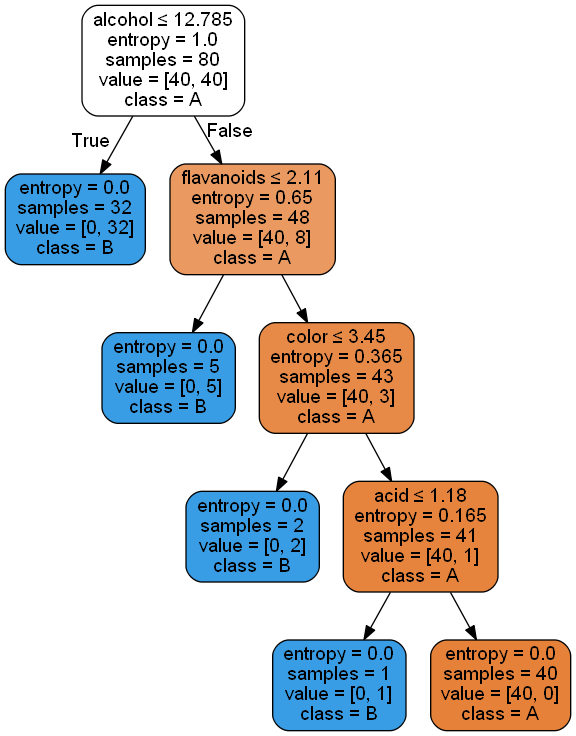

In [10]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
import os 
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
dot_data = export_graphviz(dTree, out_file=None, feature_names=colName,
                          class_names=['A','B'], filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [11]:
print("The score of whole Tree : {:.2f}".format(dTree.score(wine[colName], wine.wine)))

The score of whole Tree : 1.00


#3. Most important variable to classify type<br>

the most two important features are:<br>
>alcohol<br>
>flavanoids<br>

and remainings: color, acid so on


#4. Compute the training error<br>

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    wine[colName], wine.wine, test_size=0.25,
    stratify=wine.wine, random_state=None)

In [13]:
tTree = DecisionTreeClassifier(random_state=0, criterion="entropy")
tTree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [14]:
print("The first train score : {:.2f}".format(tTree.score(X_train, y_train)))
print("Follwing test score   : {:.2f}".format(tTree.score(X_test, y_test)))

The first train score : 1.00
Follwing test score   : 0.85


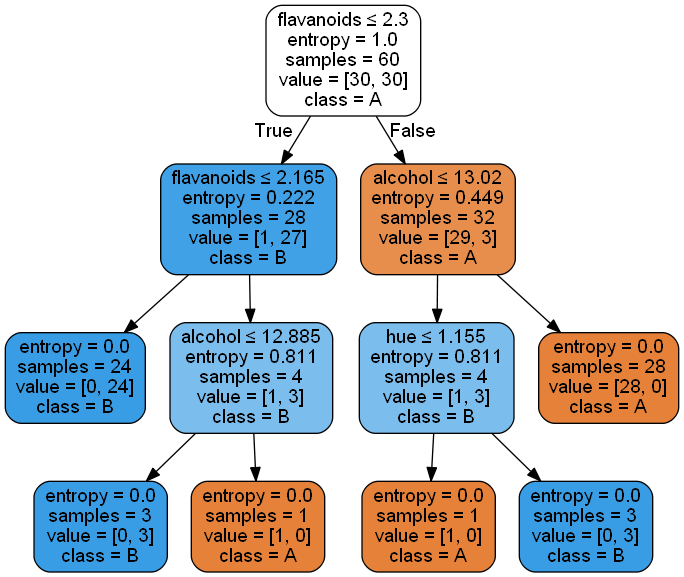

In [15]:
dot_data = export_graphviz(tTree, out_file=None, feature_names=colName,
                          class_names=['A','B'], filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

<h5>실험에 대해서</h5><br>
생각보다 데이터 수가 적어서 그런지, 결정 변수가 테스트 데이터 측정에 따라 확실히 많이 오락가락했다.<br>
총 10번의 시행 결과, 전체 데이터를 학습한 결과와 같은 경우도 있었고, (1.0) <br>
술 다음 마그네슘-색이 나오는 경우 (0.9)<br>
위의 결과 처럼 플라보노이드가 먼저 나오는 경우도 있었다.<br>

>하지만, 결과적으로 많은 변형 중에서도 높은 성능은 alcohol-flavanoids 라인으로 이어지는 분류 결과가 가장 정확하다고 볼 수 있었다. 

#5. Apply wine_test.csv<br>
5-1. predict with model<br>
5-2. show predicted result<br>

In [17]:
td = pd.read_csv('wine_test.csv')
td.head()

,alcohol,acid,ash1,ash2,magnesium,phenol,flavanoids,color,hue
0,13.56,1.71,2.31,16.2,117,3.15,3.29,6.13,0.95
1,11.56,2.05,3.23,28.5,119,3.18,5.08,6.00,0.93
2,13.88,1.89,2.59,15.0,101,3.25,3.56,5.43,0.88
3,13.24,3.98,2.29,17.5,103,2.64,2.63,4.36,0.82
4,13.90,1.68,2.12,16.0,101,3.10,3.39,6.10,0.91


In [18]:
td.tail()

,alcohol,acid,ash1,ash2,magnesium,phenol,flavanoids,color,hue
15,12.07,2.16,2.17,21.0,85,2.60,2.65,2.76,0.86
16,12.43,1.53,2.29,21.5,86,2.74,3.15,3.94,0.69
17,11.79,2.13,2.78,28.5,92,2.13,2.24,3.00,0.97
18,12.37,1.63,2.30,24.5,88,2.22,2.45,2.12,0.89
19,13.41,3.84,2.12,18.8,90,2.45,2.68,4.28,0.91


In [19]:
dResult = dTree.predict(td)
tResult = tTree.predict(td)

In [20]:
print(dResult == tResult)

[ True False  True  True  True  True  True  True False  True  True  True
  True False False False False  True False  True]


<h5>결과에 대해서</h5><br>
앞서 언급한 것과 같이, 데이터 셋의 상태에 따라서 예측 모델이 달랐는데,<br>
alcohol-flavanoids 라인으로 예측했을 경우 전체 예측 결과가 True로 맞았지만<br>
이번 경우와 같이 정확도가 낮게 데이터가 잡히고, 학습되면 부정확한 결과가 나온다<br>

아마도, 교수님, 조교님께서 다른 환경에서 코드를 실행하면 다른 결과가 나올 것이다.<br>

#6. Two most important variables<br>
6-1. plot trainig set on two-dimensional space<br>
6-2. visulaize obesrvation with two colors<br><br>

In [21]:
pTree = DecisionTreeClassifier(random_state=0, criterion="entropy")
pTree.fit(wine[['alcohol','flavanoids']], wine.wine)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

>우선, alcohol, flavanoids라고 생각하고 계속 진행한다<br>

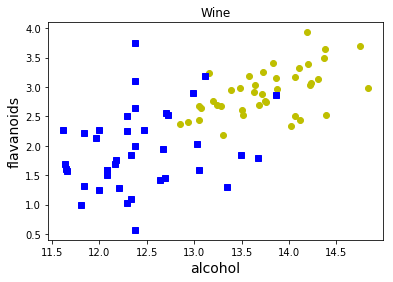

In [22]:
df = wine
X = 'alcohol'
Y = 'flavanoids'

y = pTree.predict(df[[X, Y]])

plt.plot(df[X][y=='A'], df[Y][y=='A'], "yo", label="A")
plt.plot(df[X][y=='B'], df[Y][y=='B'], "bs", label="B")
plt.xlabel("alcohol", fontsize=14)
plt.ylabel("flavanoids", fontsize=14)
plt.title('Wine')
plt.show()

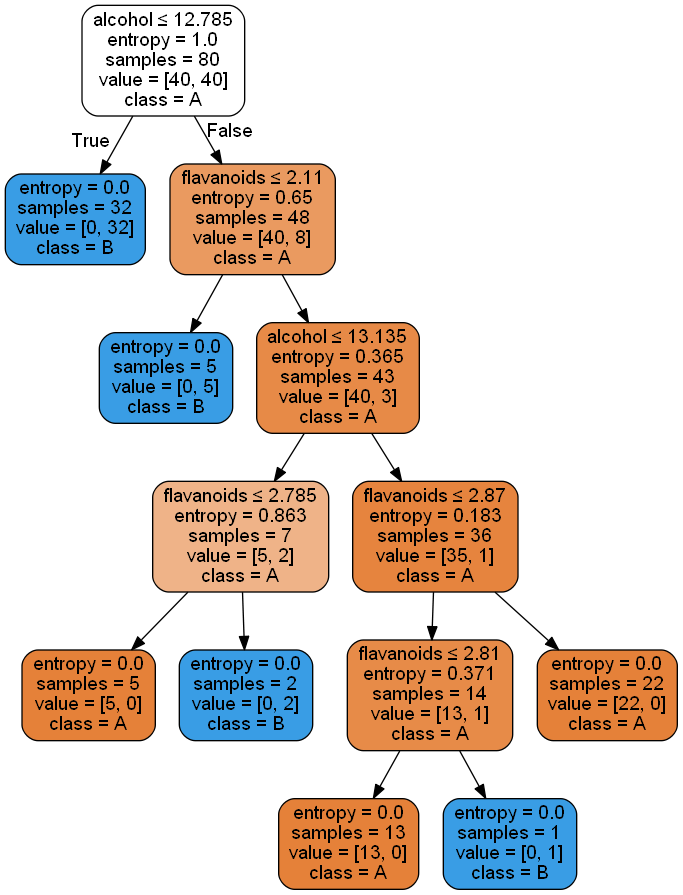

In [23]:
dot_data = export_graphviz(pTree, out_file=None, feature_names=[X, Y],
                          class_names=['A','B'], filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

<h5>결과에 대해서</h5><br>
역시 예상대로, 와인 A와 B 종류를 제법 잘 뭉치게 만들었다.<br>
다른 집단과의 coupling(연계)은 최대한 적게,<br>
같은 집단 내의 cohesion(응집)은 최대한 크게 최선으로 분류한 것 같다<br>

중간중간 보이는 파란색 (B품종) 아웃라이어들을 제거하면 더 좋을 것 같다.


#7.(기타) 실험.<br>
7-1. 도메인 지식: '와인의 맛을 결정하는 것은?'<br>

위키피디아를 참조하니, 폴리페놀의 일종인 flavanoid플라바노이드와 페놀 성분이 주요한 성분이라고 한다.<br> 이들은 색과 산미까지 결정한다고 한다.<br>

7-2. 비교<br>
실제로 와인을 분류할 때, 알코올 함량이 가장 클 것이고, 겉으로 보기에 색조가 가장 크게 두드러 질 것 같았는데, 데이터 상으로는 색조 대신에 그 원인 성분인 flavanoid가 두 번째로 강한 인자였다.<br>
wine.corr() 함수를 통해서 봤던 상관관계 역시 그 결과를 증명한다<br>
플라바노이드는 다른 인자들과의 상관관계가 상대적으로 유의미하게 높았다.

<h6>CH2: Comparing Classification methods</h6><br>
1. Based on wine.csv data, classification model using_<br>
1-1. logistic regression<br>
1-2. discriminant analysis<br>
1-3. k-nearest neighbors<br>
1-4. neural networks<br>
1-5. naïve Bayes<br>
2. Compare the classification performance by training errors and test errors<br>
2-1. result<br>
2-2. best classifier and evaluation<br>
<br>
3. 소회

<code>X_train, X_test, y_train, y_test = train_test_split(<br>
    wine[colName], wine.wine, test_size=0.25,<br>
    stratify=wine.wine, random_state=None<br>
)</code><br>
이 데이터 셋을 가지고 계속 진행한다.

#1. Based on wine.csv data, classification model using_<br>
1-1. logistic regression<br>
1-2. discriminant analysis<br>
1-3. k-nearest neighbors<br>
1-4. neural networks<br>
1-5. naïve Bayes<br>

In [25]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [26]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [27]:
from sklearn.neighbors import KNeighborsClassifier
KNC = KNeighborsClassifier()
KNC.fit(X_train, y_train)

# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# default 값은 5라고 한다.

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [28]:
from sklearn.neural_network import MLPClassifier
NN = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', 
                   solver='adam', batch_size='auto', learning_rate='constant',
                  learning_rate_init=0.001, max_iter=300, shuffle=True,
                  random_state=None)
NN.fit(X_train, y_train)
print(NN.score(X_train, y_train))
print(NN.score(X_test, y_test))
print(NN.n_layers_)
print(NN.n_iter_)
print(NN.loss_)

0.5
0.5
3
17
1.5135053040821707


In [29]:
# https://datascience.stackexchange.com/questions/36049/how-to-adjust-the-hyperparameters-of-mlp-classifier-to-get-more-perfect-performa
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(NN, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_train, y_train)

C:\Users\miger\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=3, error_score='raise',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=300, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50), (100,)], 'activation': ['tanh', 'relu'], 'solver': ['sgd', 'adam'], 'alpha': [0.0001, 0.05], 'learning_rate': ['constant', 'adaptive']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [30]:
print('Best parameters found:\n', clf.best_params_)

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Best parameters found:
 {'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'adam'}
0.667 (+/-0.309) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'sgd'}
0.767 (+/-0.249) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'adam'}
0.600 (+/-0.163) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.850 (+/-0.082) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.600 (+/-0.163) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'sgd'}
0.883 (+/-0.125) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'adam'

In [31]:
# Best parameters found:
#  {'activation': 'tanh', 'alpha': 0.05,
#   'hidden_layer_sizes': (100,),
#   'learning_rate': 'constant',
#   'solver': 'adam'}

NN = MLPClassifier(hidden_layer_sizes=(100,), activation='tanh', 
                   solver='adam', batch_size='auto', learning_rate='constant',
                  learning_rate_init=0.001, max_iter=300, shuffle=True,
                  random_state=None)
NN.fit(X_train, y_train)

C:\Users\miger\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=300, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [32]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(X_train, y_train)

GaussianNB(priors=None)

<h5>기나긴 학습 코드를 끝으로,</h5><br>
간단하게 로지스틱회귀, 선형판별분석, K-nearest, MLP다층신경망, 나이브베이즈 모델을 학습 시켰다.<br>
중간에 다층 신경망의 hyper_parameter 선별을 위해서 실험하는 코드를 찾아 적용시켰다.<br>
함수를 만들어서 직접 해볼까 했는데, 이미 구현해 두신 뛰어난 거인의 어깨에 잠시 올라가기로 했다.<br>
이번 과제 덕분에 GridSearchCV라는 아주 소중한 도구가 내 인생에 하나 더 생겼다.

#2. Compare the classification performance by training errors and test errors<br>
2-1. result<br>
2-2. best classifier and evaluation<br>

In [37]:
trainL = [] # 학습 데이터 모델이 저장된다.
testL = [] # 테스트 데이터 모델이 저장된다.

# 아래의 trainF, testF 함수는 5개의 트레인, 테스트 모델의 점수를 각각
# 계산해서 출력하도록 만든 함수이다.
# 함수와 간단한 반복문을 통해서 출력시켰고,
# 위에 선언한 두 배열에 저장해서 시각화 했다.

In [38]:
def trainF(model, st):
    a = model.score(X_train, y_train)
    trainL.append(a)
    print("The train score of "+st+" is :     {:.2f}".format(a))

In [39]:
def testF(model, st):
    a = model.score(X_test, y_test)
    testL.append(a)
    print("Follwing test score of "+st+" is : {:.2f}".format(a))

In [40]:
modelNames = ['LR', 'LDA', 'KNC', 'NN', 'NB']
models = [LR, LDA, KNC, NN, NB]
for i in range(0,5):
    trainF(models[i], modelNames[i])
    testF(models[i], modelNames[i])

The train score of LR is :     0.93
Follwing test score of LR is : 0.75
The train score of LDA is :     0.98
Follwing test score of LDA is : 0.90
The train score of KNC is :     0.87
Follwing test score of KNC is : 0.80
The train score of NN is :     1.00
Follwing test score of NN is : 0.70
The train score of NB is :     0.98
Follwing test score of NB is : 0.85


<Figure size 432x288 with 0 Axes>

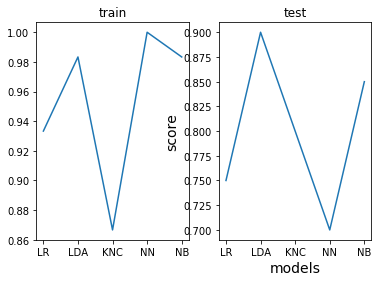

In [41]:
one = plt.figure(edgecolor='k')
one.canvas.set_window_title('Test Result')
one, two = plt.subplots(1, 2)
# ax = fig.add_subplot(311)
# as2 = fig.add_subplot(312)
plt.xlabel("models", fontsize=14)
plt.ylabel("score", fontsize=14)
two[0].plot(modelNames, trainL)
two[0].title.set_text("train")

two[1].plot(modelNames, testL)
two[1].title.set_text("test")

plt.show()

<h4>모델 결과의 해석</h4><br>
너무 기분이 좋아서 참지 못하고 4번째 헤더를 썼다.<br>
신경망에 train data set에 최적의 hyper parameter를 주었더니 <br>
예상대로 과적합 상태가 나타났다!!!<br>
이전에 초기 값으로만 실험 했을 경우에는<br>
(+)추가적으로 데이터가 알코올-플라보노이드를 결정하는 최적의 조합이었다.<br>

        LR | LDA | KNC | NN | NB  <br>
Train: 0.9   1.0   0.85  0.5  0.95 <br>
Test:  0.9   1.0   0.80  0.5  0.95 <br>
<br>
이랬던 0.5의 뉴럴 넷이, 최적화를 통해서 오버피팅까지 만들다니!<br>
결론적으로, 최고를 위해서는 hyper-parameter 수정을 통한,<br>
세심한 모델 설계가 중요하다는 것을 깨달았다.
<br>

지금 보고서를 쓰는 jupyter 노트북에서 출현한 '불리한' 결과를<br>
그때 혼자서 실험한, 최적의 결과와 비교하면, 아래와 같다.<br>
<br>
The train score of LR is :     0.93<br>
Follwing test score of LR is : 0.75<br>
The train score of LDA is :     0.98<br>
Follwing test score of LDA is : 0.90<br>
The train score of KNC is :     0.87<br>
Follwing test score of KNC is : 0.80<br>
The train score of NN is :     1.00<br>
Follwing test score of NN is : 0.70<br>
The train score of NB is :     0.98<br>
Follwing test score of NB is : 0.85<br>
<br>
당시 이런 결과가 나왔는데,<br>
판별 분석과 나이브 베이즈는 확률과 분포에 기반을 둔, 안정적인 결과를 보여줬고,<br>
로지스틱 회귀 모델과 뉴럴 넷은, 선형성 뿐만 아니라, 오버피팅까지 닮아서,<br>
어떻게 보면 '취약한' 결과를 보여줬다. <br>
k-nearest classifier 모델도, 데이터 셋과 독립적으로 성능을 보여줬는데,<br>
이는 역시 모델의 계산 특성 때문일 것이다.

K최근접 이웃에 관한 실험을 더 하면,<br>

In [59]:
def trainKNN(num):
    a = KNeighborsClassifier(n_neighbors=num)
    a.fit(X_train, y_train)
    b = a.score(X_train, y_train)
    print("The train score of k="+repr(num)+" is : {:.2f}".format(b))
    b = a.score(X_test, y_test)
    print("The test score of  k="+repr(num)+" is : {:.2f}".format(b))


In [60]:
for i in range(1,10):
    trainKNN(i)

The train score of k=1 is : 1.00
The test score of  k=1 is : 0.70
The train score of k=2 is : 0.88
The test score of  k=2 is : 0.75
The train score of k=3 is : 0.95
The test score of  k=3 is : 0.80
The train score of k=4 is : 0.85
The test score of  k=4 is : 0.70
The train score of k=5 is : 0.87
The test score of  k=5 is : 0.80
The train score of k=6 is : 0.83
The test score of  k=6 is : 0.75
The train score of k=7 is : 0.83
The test score of  k=7 is : 0.80
The train score of k=8 is : 0.78
The test score of  k=8 is : 0.75
The train score of k=9 is : 0.80
The test score of  k=9 is : 0.70


'1'일때 과적합 (뉴럴넷과, 로지스틱 회귀의 모습을 잘 반영)<br>
'3'에서 최고의 성능을 보였다.<br>

KNN 모델도, 데이터 셋이 너무 크지 않다면, 여러 실험을 해야 함을 느꼈다.<br>
<br>

In [61]:
for i in range(10,20):
    trainKNN(i)

The train score of k=10 is : 0.75
The test score of  k=10 is : 0.75
The train score of k=11 is : 0.77
The test score of  k=11 is : 0.75
The train score of k=12 is : 0.75
The test score of  k=12 is : 0.75
The train score of k=13 is : 0.75
The test score of  k=13 is : 0.75
The train score of k=14 is : 0.75
The test score of  k=14 is : 0.75
The train score of k=15 is : 0.75
The test score of  k=15 is : 0.75
The train score of k=16 is : 0.75
The test score of  k=16 is : 0.70
The train score of k=17 is : 0.75
The test score of  k=17 is : 0.75
The train score of k=18 is : 0.75
The test score of  k=18 is : 0.75
The train score of k=19 is : 0.75
The test score of  k=19 is : 0.75


In [62]:
for i in range(20,30):
    trainKNN(i)

The train score of k=20 is : 0.75
The test score of  k=20 is : 0.75
The train score of k=21 is : 0.75
The test score of  k=21 is : 0.75
The train score of k=22 is : 0.75
The test score of  k=22 is : 0.70
The train score of k=23 is : 0.75
The test score of  k=23 is : 0.75
The train score of k=24 is : 0.75
The test score of  k=24 is : 0.75
The train score of k=25 is : 0.75
The test score of  k=25 is : 0.75
The train score of k=26 is : 0.75
The test score of  k=26 is : 0.75
The train score of k=27 is : 0.75
The test score of  k=27 is : 0.75
The train score of k=28 is : 0.75
The test score of  k=28 is : 0.75
The train score of k=29 is : 0.75
The test score of  k=29 is : 0.75


묻고 더블로 가! 와 같은 생각으로 더 실험 했는데,<br>
역시 generalized가 이미 k=10에서 부터 이루어져, 수렴했다.<br><br><br>

내친김에, 근래 가장 높은 성능을 보인다는, random forest 까지 한 번 해봤다.<br>

In [64]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(n_estimators=100, max_depth=4,
                            random_state=0)
RFC.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [66]:
print("The train score is: {:.2f}".format(RFC.score(X_train, y_train)))

print("The test score is:  {:.2f}".format(RFC.score(X_test, y_test)))

The train score is: 1.00
The test score is:  0.90


#3. 소회

짧게 말하면. 과제가 매우 매우 매우 만족스러웠다.<br>
이번 학기에 했던 과제 중에서 가장 시간가는 줄 모르고 즐겁게 몰두했다.<br>
<br>
결론적으로 이렇게 좋은 모델들을 적재적소에 잘 써야 함을 알게되었고<br>
앞으로 랜덤 포레스트를 많이 써야겠다고 생각이 들었다.<br>
그리고 데이터 마이닝 수업에서도 다루는 다른 모델들을 더 깊이 연구할 생각이다.<br>
<br>
<h6>
길고 군더더기 많은 과제를 읽어 주신 조교님께<br><br>

그리고 좋은 과제를 내주신 교수님께 감사 드립니다.<br><br>

- 문헌정보/컴퓨터공학과 학생 김무성.
</h6>